In [1]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
data = pd.read_csv('wine.data.txt', header=None, names=['Wine type','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols', 'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])
print(data)

     Wine type  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   
5            1    14.20        1.76  2.45               15.2        112   
6            1    14.39        1.87  2.45               14.6         96   
7            1    14.06        2.15  2.61               17.6        121   
8            1    14.83        1.64  2.17               14.0         97   
9            1    13.86        1.35  2.27               16.0         98   
10           1    14.10        2.16  2.30               18.0        105   
11           1    14.12        1.48  2.32               16.8         95   
12           1    13.75  

In [3]:
data.describe()

Wine type     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

In [4]:
#data.insert(1, 'Bias', 0)

In [5]:
train_data = data.sample(frac=0.7, random_state=200)
test_data  = data.drop(train_data.index)
print(train_data.shape, test_data.shape)

(125, 14) (53, 14)


In [6]:
print(test_data)

     Wine type  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
1            1    13.20        1.78  2.14               11.2        100   
3            1    14.37        1.95  2.50               16.8        113   
6            1    14.39        1.87  2.45               14.6         96   
7            1    14.06        2.15  2.61               17.6        121   
14           1    14.38        1.87  2.38               12.0        102   
16           1    14.30        1.92  2.72               20.0        120   
20           1    14.06        1.63  2.28               16.0        126   
23           1    12.85        1.60  2.52               17.8         95   
26           1    13.39        1.77  2.62               16.1         93   
29           1    14.02        1.68  2.21               16.0         96   
35           1    13.48        1.81  2.41               20.5        100   
42           1    13.88        1.89  2.59               15.0        101   
51           1    13.83  

In [7]:
cols = data.shape[1]
Xtrain = train_data.iloc[:,1:cols]
ytrain = train_data.iloc[:,0:1]

In [8]:
Xtrain.head()

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
67     12.37        1.17  1.92               19.6         78           2.11   
44     13.05        1.77  2.10               17.0        107           3.00   
160    12.36        3.83  2.38               21.0         88           2.30   
171    12.77        2.39  2.28               19.5         86           1.39   
164    13.78        2.76  2.30               22.0         90           1.35   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
67         2.00                  0.27             1.04         4.680000  1.12   
44         3.00                  0.28             2.03         5.040000  0.88   
160        0.92                  0.50             1.04         7.650000  0.56   
171        0.51                  0.48             0.64         9.899999  0.57   
164        0.68                  0.41             1.03         9.580000  0.70   

     OD280/OD315 of diluted wines  Proline  
67                           3.48      510  
44                           3.35      885  
160                          1.58      520  
171                          1.63      470  
164                          1.68      615

In [9]:
ytrain.head()

Wine type
67           2
44           1
160          3
171          3
164          3

In [10]:
#Converte para npmatrix
Xtrain = np.matrix(Xtrain.values)
ytrain = np.matrix(ytrain.values)
beta = np.matrix(np.array([0,0,0,0,0,0,0,0,0,0,0,0,0]))

In [11]:
Xtrain.shape, beta.shape, ytrain.shape

((125, 13), (1, 13), (125, 1))

In [12]:
def compute_cost(X, y, beta):
    sumitem = np.power(((X * beta.T) - y), 2)
    return (np.sum(sumitem) / (2 * len(X)))

In [13]:
compute_cost(Xtrain, ytrain, beta)

2.136

In [14]:
def gradient_descent(X, y, theta, alpha, iters):
    '''
    alpha: learning rate
    iters: number of iterations
    OUTPUT:
    theta: learned parameters
    cost:  a vector with the cost at each training iteration
    '''
    temp       = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost       = np.zeros(iters)
    
    for i in range(iters):
        erro = (X * theta.T) - y

        for j in range(parameters):
            #Calcula o erro para cada amostra
            erroamos = np.multiply(erro, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(erroamos))

        theta = temp
        print(theta)
        cost[i] = compute_cost(X, y, theta)
        print(cost[i])
        
    return theta, cost

In [15]:
alpha = 0.000001
iters = 1500

In [16]:
g, cost = gradient_descent(Xtrain, ytrain, beta, alpha, iters)
g

[[2.471824e-05 4.732080e-06 4.546240e-06 3.900480e-05 1.882000e-04
  4.082800e-06 3.322400e-06 7.362400e-07 2.800320e-06 1.017856e-05
  1.754160e-06 4.606400e-06 1.268056e-03]]
1.027392226280186
[[3.68194297e-05 7.34253372e-06 6.79907255e-06 5.97487892e-05
  2.79177561e-04 5.85032594e-06 4.47931362e-06 1.14065022e-06
  4.02024881e-06 1.52402276e-05 2.55455412e-06 6.65039096e-06
  1.70428354e-03]]
0.8927086729165936
[[4.45436340e-05 9.21666245e-06 8.25622597e-06 7.41555612e-05
  3.36424963e-04 6.81486060e-06 4.88540454e-06 1.42990177e-06
  4.69203504e-06 1.85272937e-05 3.02410141e-06 7.80552719e-06
  1.85223227e-03]]
0.8750053161509558
[[5.07465838e-05 1.08345657e-05 9.43676289e-06 8.63574377e-05
  3.81946509e-04 7.50051034e-06 5.03094731e-06 1.67908567e-06
  5.17342136e-06 2.11980838e-05 3.37868474e-06 8.65180652e-06
  1.90027792e-03]]
0.8713564274405146
[[5.64179837e-05 1.23626311e-05 1.05205738e-05 9.77865523e-05
  4.23368190e-04 8.08891332e-06 5.08585482e-06 1.91422611e-06
  5.58838

0.577060454245226
[[ 1.13808614e-03  3.14996618e-04  2.16662831e-04  2.31808100e-03
   8.13588877e-03  1.09902210e-04 -5.64225638e-06  4.85482318e-05
   7.72052595e-05  5.16485285e-04  6.00693778e-05  1.36606997e-04
   9.52344627e-04]]
0.5761474105468766
[[ 1.14216788e-03  3.16163545e-04  2.17435858e-04  2.32649927e-03
   8.16425310e-03  1.10259642e-04 -5.73737817e-06  4.87284362e-05
   7.74547648e-05  5.18447524e-04  6.02710377e-05  1.37044204e-04
   9.48764795e-04]]
0.5752368888185126
[[ 1.14624480e-03  3.17329319e-04  2.18207931e-04  2.33490797e-03
   8.19257739e-03  1.10616414e-04 -5.83287485e-06  4.89084658e-05
   7.77037910e-05  5.20408365e-04  6.04723611e-05  1.37480514e-04
   9.45189945e-04]]
0.5743288820621945
[[ 1.15031692e-03  3.18493940e-04  2.18979050e-04  2.34330712e-03
   8.22086171e-03  1.10972526e-04 -5.92874590e-06  4.90883208e-05
   7.79523388e-05  5.22367809e-04  6.06733483e-05  1.37915927e-04
   9.41620068e-04]]
0.5734233832994
[[ 1.15438424e-03  3.19657410e-04  2.

0.43138793225662975
[[ 1.89910376e-03  5.36992592e-04  3.59919678e-04  3.89462775e-03
   1.32927006e-02  1.71778339e-04 -3.31042871e-05  8.28979655e-05
   1.20030739e-04  9.00598431e-04  9.56951981e-05  2.10488538e-04
   3.00068696e-04]]
0.43087667829385706
[[ 1.90230814e-03  5.37949084e-04  3.60518605e-04  3.90130035e-03
   1.33137684e-02  1.72015469e-04 -3.32677049e-05  8.30462906e-05
   1.20192920e-04  9.02305488e-04  9.58355185e-05  2.10762131e-04
   2.97396617e-04]]
0.4303668314375664
[[ 1.90550893e-03  5.38904714e-04  3.61116819e-04  3.90796579e-03
   1.33348064e-02  1.72252106e-04 -3.34314024e-05  8.31944849e-05
   1.20354743e-04  9.04011498e-04  9.59755876e-05  2.11035053e-04
   2.94728258e-04]]
0.4298583877834977
[[ 1.90870612e-03  5.39859482e-04  3.61714319e-04  3.91462408e-03
   1.33558144e-02  1.72488251e-04 -3.35953792e-05  8.33425486e-05
   1.20516209e-04  9.05716461e-04  9.61154056e-05  2.11307306e-04
   2.92063614e-04]]
0.4293513434382249
[[ 1.91189973e-03  5.40813389e-

[[ 2.54812370e-03  7.35681756e-04  4.80248239e-04  5.25388583e-03
   1.74126270e-02  2.14461334e-04 -7.71155390e-05  1.13781619e-04
   1.48736796e-04  1.26681290e-03  1.21904905e-04  2.57340780e-04
  -2.24172601e-04]]
0.34413240809974216
[[ 2.55062181e-03  7.36468722e-04  4.80706999e-04  5.25915241e-03
   1.74278262e-02  2.14601678e-04 -7.73338195e-05  1.13904259e-04
   1.48828735e-04  1.26831410e-03  1.21995887e-04  2.57482770e-04
  -2.26114516e-04]]
0.3438606265883689
[[ 2.55311730e-03  7.37255059e-04  4.81165240e-04  5.26441376e-03
   1.74430037e-02  2.14741664e-04 -7.75523031e-05  1.14026804e-04
   1.48920413e-04  1.26981454e-03  1.22086686e-04  2.57624273e-04
  -2.28053724e-04]]
0.3435895877482525
[[ 2.55561017e-03  7.38040768e-04  4.81622961e-04  5.26966991e-03
   1.74581594e-02  2.14881291e-04 -7.77709896e-05  1.14149254e-04
   1.49011832e-04  1.27131421e-03  1.22177303e-04  2.57765288e-04
  -2.29990230e-04]]
0.34331928951890006
[[ 2.55810043e-03  7.38825850e-04  4.82080163e-04 

  -0.00050595]]
0.30850102892094317
[[ 0.00292317  0.00085623  0.00054865  0.0060483   0.01962321  0.00023293
  -0.00011519  0.0001326   0.00016053  0.00150212  0.00013449  0.0002745
  -0.0005075 ]]
0.3083262632469027
[[ 0.00292528  0.00085693  0.00054903  0.00605281  0.01963523  0.00023302
  -0.00011544  0.00013271  0.00016058  0.00150351  0.00013456  0.00027457
  -0.00050904]]
0.30815197109171727
[[ 0.0029274   0.00085762  0.00054941  0.00605731  0.01964724  0.00023311
  -0.00011568  0.00013282  0.00016064  0.0015049   0.00013462  0.00027464
  -0.00051059]]
0.3079781511417749
[[ 0.00292951  0.00085832  0.00054979  0.0060618   0.01965923  0.0002332
  -0.00011593  0.00013293  0.00016069  0.00150629  0.00013468  0.00027471
  -0.00051213]]
0.30780480208710814
[[ 0.00293162  0.00085901  0.00055017  0.0060663   0.0196712   0.00023328
  -0.00011618  0.00013304  0.00016074  0.00150767  0.00013475  0.00027478
  -0.00051367]]
0.3076319226213855
[[ 0.00293372  0.00085971  0.00055056  0.00607079

[[ 0.00328359  0.00097756  0.00061329  0.00682022  0.02158536  0.00024477
  -0.00016386  0.00015162  0.00016727  0.00175086  0.00014414  0.00028151
  -0.00076107]]
0.28280903335289337
[[ 0.00328536  0.00097818  0.0006136   0.00682404  0.02159455  0.00024481
  -0.00016413  0.00015171  0.00016729  0.00175215  0.00014418  0.00028152
  -0.00076226]]
0.28270342763216844
[[ 0.00328713  0.00097879  0.00061391  0.00682786  0.02160371  0.00024485
  -0.00016441  0.00015181  0.00016731  0.00175344  0.00014422  0.00028153
  -0.00076345]]
0.28259810358538845
[[ 0.0032889   0.0009794   0.00061423  0.00683167  0.02161287  0.00024489
  -0.00016468  0.00015191  0.00016733  0.00175473  0.00014426  0.00028153
  -0.00076464]]
0.2824930604312979
[[ 0.00329067  0.00098001  0.00061454  0.00683548  0.02162201  0.00024493
  -0.00016496  0.000152    0.00016735  0.00175602  0.0001443   0.00028154
  -0.00076583]]
0.2823882973908086
[[ 0.00329243  0.00098062  0.00061486  0.00683929  0.02163113  0.00024497
  -0.000

0.2683404166794496
[[ 0.00356494  0.00107708  0.00066279  0.00743017  0.02297506  0.00024881
  -0.00021246  0.00016728  0.00016852  0.00196488  0.00014953  0.00027867
  -0.00094264]]
0.26827303199132296
[[ 0.00356647  0.00107763  0.00066305  0.0074335   0.0229822   0.00024882
  -0.00021275  0.00016736  0.00016851  0.00196609  0.00014955  0.00027863
  -0.00094358]]
0.2682058229792145
[[ 0.00356799  0.00107818  0.00066332  0.00743683  0.02298933  0.00024882
  -0.00021305  0.00016745  0.00016851  0.00196731  0.00014958  0.00027859
  -0.00094452]]
0.26813878915600425
[[ 0.00356952  0.00107874  0.00066358  0.00744015  0.02299645  0.00024883
  -0.00021334  0.00016754  0.0001685   0.00196852  0.0001496   0.00027855
  -0.00094546]]
0.26807193003592383
[[ 0.00357104  0.00107929  0.00066385  0.00744348  0.02300356  0.00024884
  -0.00021363  0.00016762  0.0001685   0.00196974  0.00014962  0.00027851
  -0.00094639]]
0.26800524513455315
[[ 0.00357256  0.00107984  0.00066411  0.0074468   0.02301066 

0.25589727064008233
[[ 0.00391096  0.00120682  0.00072218  0.00819149  0.02446664  0.0002458
  -0.00028853  0.00018778  0.00016387  0.00225849  0.00015287  0.0002624
  -0.00114087]]
0.25586159832390265
[[ 0.00391221  0.00120731  0.0007224   0.00819428  0.02447155  0.00024577
  -0.00028884  0.00018786  0.00016384  0.00225963  0.00015287  0.00026231
  -0.00114153]]
0.25582601377605774
[[ 0.00391347  0.0012078   0.00072261  0.00819707  0.02447646  0.00024574
  -0.00028916  0.00018794  0.00016381  0.00226077  0.00015288  0.00026222
  -0.00114219]]
0.2557905167533633
[[ 0.00391472  0.00120828  0.00072282  0.00819985  0.02448135  0.00024571
  -0.00028947  0.00018801  0.00016377  0.0022619   0.00015288  0.00026213
  -0.00114285]]
0.2557551070133097
[[ 0.00391598  0.00120877  0.00072303  0.00820264  0.02448624  0.00024568
  -0.00028978  0.00018809  0.00016374  0.00226304  0.00015289  0.00026204
  -0.00114351]]
0.2557197843140602
[[ 0.00391723  0.00120926  0.00072324  0.00820542  0.02449112  0.

matrix([[ 0.00397995,  0.00123383,  0.0007338 ,  0.00834499,  0.02473047,
          0.00024396, -0.00030622,  0.00019206,  0.00016198,  0.00232174,
          0.00015302,  0.00025718, -0.00117652]])

In [17]:
compute_cost(Xtrain, ytrain, g)

0.25399717020520407

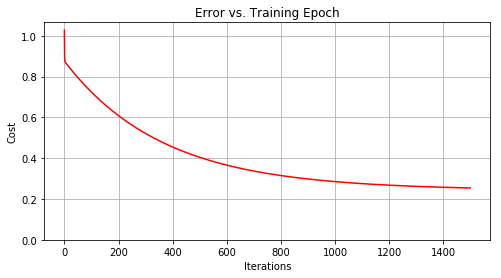

In [18]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_ylim(0.0)
ax.set_title('Error vs. Training Epoch')
ax.grid(True)

In [19]:
def network_output(w, x, b):
    linearReg = (w*x.T).T + b
    return linearReg

In [101]:
def perceptron(max_it, alpha, X, d):
    weights = np.matrix(np.zeros((3,13)))
    bias = np.matrix(np.zeros((3,1)))
    y = np.matrix(np.zeros((3,X.shape[0])))
    error = np.matrix(np.zeros((max_it, 3)))

    temp = np.zeros((13,1))
    
    for epoch in range(max_it):
        E = 0
        for i in range (0,3):
            y = network_output(weights[i], X, bias[i])
            e = d - y
            print(y)
            temp = weights[i].T + alpha *(X.T * e)
            weights[i] = temp.T
            #print(weights[i])
            #print(weights[i].shape)
            bias[i] = bias[i] + alpha * np.sum(e)
            E = E + np.sum(np.power(e,2))
            error[epoch] = E
    return error, weights
            
                

In [102]:
alpha = 0.00000001
iters = 500

In [103]:
error, weights = perceptron(iters, alpha, Xtrain, ytrain)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0

[[1.03772536]
 [1.75308534]
 [1.07048507]
 [0.97720548]
 [1.2451922 ]
 [1.64842402]
 [1.54002567]
 [0.76735822]
 [2.00054369]
 [3.18753875]
 [1.06612467]
 [0.79050046]
 [1.36315746]
 [1.3038594 ]
 [2.44836028]
 [1.1573885 ]
 [1.92484916]
 [1.05777224]
 [2.13645422]
 [1.74768248]
 [0.65443235]
 [0.80948616]
 [1.00744038]
 [0.78292348]
 [1.02832598]
 [2.87732541]
 [0.86984945]
 [2.43092366]
 [2.64755278]
 [2.47550153]
 [1.25312783]
 [1.15971629]
 [1.51274931]
 [0.86208639]
 [1.43199623]
 [1.01695998]
 [1.38493282]
 [2.20673719]
 [1.02181849]
 [1.74764261]
 [1.55593046]
 [1.49954188]
 [1.36755058]
 [2.2861245 ]
 [0.87728374]
 [1.33892218]
 [1.66680771]
 [1.37378196]
 [0.94143906]
 [0.91478945]
 [0.91483761]
 [2.20710176]
 [1.22558955]
 [1.25724897]
 [1.69301984]
 [1.80818078]
 [2.88808649]
 [2.02676679]
 [1.0323684 ]
 [1.06599302]
 [0.80993224]
 [1.27576464]
 [1.41900009]
 [1.36622483]
 [0.81546287]
 [1.37453791]
 [1.14475797]
 [1.31449498]
 [1.98242665]
 [1.23965527]
 [1.69147627]
 [2.06

 [1.99137811]]
[[1.06177834]
 [1.75626492]
 [1.1050033 ]
 [1.01616177]
 [1.26923775]
 [1.65496274]
 [1.53888814]
 [0.83612054]
 [1.96442905]
 [3.08075777]
 [1.12876367]
 [0.83500707]
 [1.38661726]
 [1.35121914]
 [2.38292911]
 [1.19823162]
 [1.90723034]
 [1.0900429 ]
 [2.11420287]
 [1.75442937]
 [0.71983183]
 [0.85661317]
 [1.04213849]
 [0.8642487 ]
 [1.06867466]
 [2.79129699]
 [0.9099166 ]
 [2.38322285]
 [2.59125622]
 [2.4238963 ]
 [1.27561607]
 [1.21823734]
 [1.5879117 ]
 [0.90859434]
 [1.4393646 ]
 [1.09583505]
 [1.41794382]
 [2.15352008]
 [1.04570454]
 [1.74494574]
 [1.599092  ]
 [1.53726314]
 [1.37870504]
 [2.2412192 ]
 [0.92326515]
 [1.36684674]
 [1.6642714 ]
 [1.4057468 ]
 [0.98343865]
 [0.97017513]
 [0.96083932]
 [2.18603817]
 [1.25765797]
 [1.27510178]
 [1.71141045]
 [1.80803215]
 [2.80278386]
 [1.99572974]
 [1.09974263]
 [1.09668919]
 [0.86058413]
 [1.30044231]
 [1.455618  ]
 [1.38420297]
 [0.86740173]
 [1.39912083]
 [1.17218458]
 [1.37022362]
 [2.01122139]
 [1.28300908]
 [1.7

[[1.08485862]
 [1.75930648]
 [1.13812402]
 [1.0535399 ]
 [1.29231811]
 [1.6612376 ]
 [1.53780695]
 [0.90206636]
 [1.92979614]
 [2.9783395 ]
 [1.18883014]
 [0.87769717]
 [1.40912588]
 [1.39665364]
 [2.32017298]
 [1.23741673]
 [1.89032694]
 [1.12100913]
 [2.0928558 ]
 [1.76088806]
 [0.78255691]
 [0.90182234]
 [1.07543033]
 [0.94224631]
 [1.10738202]
 [2.7087837 ]
 [0.94836041]
 [2.33747031]
 [2.53725271]
 [2.3743949 ]
 [1.29720565]
 [1.27437004]
 [1.65996674]
 [0.95320702]
 [1.44644164]
 [1.17149107]
 [1.44960631]
 [2.10247053]
 [1.0686165 ]
 [1.74235897]
 [1.64046428]
 [1.57343565]
 [1.38941812]
 [2.19814961]
 [0.96736982]
 [1.39365238]
 [1.66184087]
 [1.43640239]
 [1.02373125]
 [1.02328948]
 [1.00496568]
 [2.16583219]
 [1.28842161]
 [1.29224152]
 [1.72903413]
 [1.80788631]
 [2.72096919]
 [1.96595517]
 [1.16436874]
 [1.12611665]
 [0.90917216]
 [1.32411097]
 [1.49074904]
 [1.4014461 ]
 [0.91722658]
 [1.42269019]
 [1.19849152]
 [1.42365954]
 [2.03883678]
 [1.32459288]
 [1.74082964]
 [2.01

[[1.10881063]
 [1.76245227]
 [1.17249386]
 [1.09232665]
 [1.31627831]
 [1.66775011]
 [1.53669657]
 [0.97046262]
 [1.89387913]
 [2.8721031 ]
 [1.25112088]
 [0.92198084]
 [1.43248186]
 [1.44379287]
 [2.25507931]
 [1.27807469]
 [1.87278842]
 [1.15314556]
 [2.07070744]
 [1.76757342]
 [0.84761766]
 [0.94872545]
 [1.1099761 ]
 [1.02314607]
 [1.14754045]
 [2.62319468]
 [0.98825278]
 [2.29001143]
 [2.48122805]
 [2.32304292]
 [1.31962275]
 [1.33259829]
 [1.73466688]
 [0.99948835]
 [1.45379344]
 [1.24997147]
 [1.48244942]
 [2.04951033]
 [1.09238465]
 [1.73967566]
 [1.68334981]
 [1.61094811]
 [1.40054675]
 [2.15347556]
 [1.01312084]
 [1.4214821 ]
 [1.65932216]
 [1.46819713]
 [1.06553606]
 [1.07837439]
 [1.05074172]
 [2.14486957]
 [1.32033823]
 [1.31003864]
 [1.74729728]
 [1.80773133]
 [2.63610767]
 [1.93506431]
 [1.23140925]
 [1.15662474]
 [0.95957785]
 [1.34866115]
 [1.52720014]
 [1.41933151]
 [0.96891792]
 [1.44712788]
 [1.22578016]
 [1.47906968]
 [2.06747838]
 [1.36772835]
 [1.76588793]
 [1.99

 [1.92063806]]
[[1.12999014]
 [1.76522412]
 [1.20288366]
 [1.12662088]
 [1.33747255]
 [1.67350938]
 [1.53572546]
 [1.03090472]
 [1.86214167]
 [2.77821   ]
 [1.3061604 ]
 [0.96112127]
 [1.45313177]
 [1.48546523]
 [2.19755052]
 [1.31401984]
 [1.85728306]
 [1.18156275]
 [2.0511274 ]
 [1.77346899]
 [0.90511668]
 [0.99018692]
 [1.14051992]
 [1.09464118]
 [1.18304045]
 [2.54755033]
 [1.02352439]
 [2.24806601]
 [2.43170543]
 [2.27765262]
 [1.3394562 ]
 [1.3840639 ]
 [1.80064988]
 [1.04039746]
 [1.46030116]
 [1.31933709]
 [1.51147681]
 [2.00269645]
 [1.11339313]
 [1.73730403]
 [1.72122575]
 [1.64409419]
 [1.41039732]
 [2.11399315]
 [1.05355815]
 [1.44610122]
 [1.65709834]
 [1.49629434]
 [1.10249302]
 [1.12705034]
 [1.09120346]
 [2.12633944]
 [1.3485522 ]
 [1.32578496]
 [1.7634223 ]
 [1.80759094]
 [2.56110888]
 [1.90775677]
 [1.29066526]
 [1.18357302]
 [1.00413287]
 [1.37035813]
 [1.55942567]
 [1.43513837]
 [1.01461174]
 [1.46871668]
 [1.24989914]
 [1.52802539]
 [2.09278917]
 [1.40585335]
 [1.7

 [1.89902259]]
[[1.15114308]
 [1.76798248]
 [1.23323363]
 [1.16086914]
 [1.35864783]
 [1.67926203]
 [1.53476652]
 [1.09123309]
 [1.83046656]
 [2.68448187]
 [1.36108909]
 [1.0001949 ]
 [1.47375317]
 [1.52707469]
 [2.14012467]
 [1.34991317]
 [1.84180025]
 [1.20994489]
 [2.03157661]
 [1.7793409 ]
 [0.96251214]
 [1.0315836 ]
 [1.17102215]
 [1.16600544]
 [1.2184857 ]
 [2.4720392 ]
 [1.05874852]
 [2.20619362]
 [2.38226235]
 [2.2323372 ]
 [1.35927617]
 [1.43544187]
 [1.86647825]
 [1.08123987]
 [1.46680775]
 [1.38858457]
 [1.54045343]
 [1.9559577 ]
 [1.13436661]
 [1.73493646]
 [1.75900773]
 [1.67717399]
 [1.42024582]
 [2.0745812 ]
 [1.09392642]
 [1.47070043]
 [1.65488071]
 [1.52433872]
 [1.13939456]
 [1.1756318 ]
 [1.1315985 ]
 [2.10783869]
 [1.37672235]
 [1.34152095]
 [1.77950248]
 [1.80744731]
 [2.48624484]
 [1.88049127]
 [1.34982201]
 [1.2104585 ]
 [1.04861554]
 [1.39201618]
 [1.59160437]
 [1.45091693]
 [1.06023378]
 [1.49025781]
 [1.27397667]
 [1.57687828]
 [2.1180524 ]
 [1.44391272]
 [1.8

 [1.87832034]]
[[1.17140731]
 [1.77061475]
 [1.26230677]
 [1.19367553]
 [1.37894125]
 [1.68477361]
 [1.53385903]
 [1.14898825]
 [1.80014519]
 [2.59473964]
 [1.41366748]
 [1.03760891]
 [1.49350555]
 [1.56692517]
 [2.08514283]
 [1.38429166]
 [1.82697109]
 [1.23713522]
 [2.01285199]
 [1.78494954]
 [1.01746419]
 [1.07122806]
 [1.20023955]
 [1.23432949]
 [1.25243135]
 [2.3997396 ]
 [1.09248949]
 [2.16610123]
 [2.33491429]
 [2.1889439 ]
 [1.37827505]
 [1.48463778]
 [1.92946774]
 [1.12035068]
 [1.47304815]
 [1.454891  ]
 [1.56819803]
 [1.91119933]
 [1.15445014]
 [1.73266947]
 [1.79515507]
 [1.70883881]
 [1.42969103]
 [2.03684641]
 [1.13258004]
 [1.49427732]
 [1.65275972]
 [1.55118695]
 [1.17473653]
 [1.22213812]
 [1.17028016]
 [2.09012148]
 [1.4037004 ]
 [1.35660543]
 [1.79488199]
 [1.80730622]
 [2.4145675 ]
 [1.85437923]
 [1.40646801]
 [1.23618489]
 [1.0912126 ]
 [1.41275239]
 [1.6224246 ]
 [1.46602398]
 [1.10392437]
 [1.51087296]
 [1.29703123]
 [1.6236365 ]
 [2.14223813]
 [1.48035496]
 [1.8

[[1.19309474]
 [1.77341981]
 [1.29341972]
 [1.22878245]
 [1.40066914]
 [1.69067301]
 [1.53290104]
 [1.21075396]
 [1.76772146]
 [2.49875149]
 [1.46988818]
 [1.07762927]
 [1.51464203]
 [1.60956164]
 [2.02633659]
 [1.42107654]
 [1.81110419]
 [1.26623593]
 [1.99281795]
 [1.79093248]
 [1.07623773]
 [1.11364143]
 [1.231505  ]
 [1.30740245]
 [1.28874874]
 [2.32240845]
 [1.1285963 ]
 [2.12321768]
 [2.28426187]
 [2.14252462]
 [1.39862202]
 [1.537261  ]
 [1.99679445]
 [1.16218979]
 [1.47973531]
 [1.52581674]
 [1.5978739 ]
 [1.86331726]
 [1.17593376]
 [1.73024458]
 [1.83378511]
 [1.74269771]
 [1.43981203]
 [1.99648666]
 [1.17392631]
 [1.51952331]
 [1.65049387]
 [1.57989959]
 [1.21254973]
 [1.27187037]
 [1.21165928]
 [2.07116735]
 [1.43256305]
 [1.37276071]
 [1.81131196]
 [1.80715111]
 [2.33790515]
 [1.82644267]
 [1.46706234]
 [1.26368312]
 [1.13678152]
 [1.43493084]
 [1.65540169]
 [1.48218182]
 [1.15066603]
 [1.53291113]
 [1.32169148]
 [1.67362871]
 [2.16810341]
 [1.51933515]
 [1.85392191]
 [1.90

 [1.83580105]]
[[1.21304409]
 [1.77598801]
 [1.32203719]
 [1.26107231]
 [1.42066493]
 [1.69610036]
 [1.53203302]
 [1.26752396]
 [1.73792338]
 [2.41051286]
 [1.52155291]
 [1.11442102]
 [1.53408147]
 [1.64876835]
 [1.97228028]
 [1.45490532]
 [1.79651263]
 [1.29300519]
 [1.97439512]
 [1.79641634]
 [1.13026317]
 [1.15264033]
 [1.26026084]
 [1.37456959]
 [1.32214328]
 [2.25132095]
 [1.16180556]
 [2.08379549]
 [2.23768982]
 [2.09984708]
 [1.41735209]
 [1.5856391 ]
 [2.05863888]
 [1.20065731]
 [1.48589503]
 [1.59102084]
 [1.62515419]
 [1.81929231]
 [1.19568525]
 [1.72801534]
 [1.86926332]
 [1.77381331]
 [1.44913433]
 [1.95938665]
 [1.21193695]
 [1.54275926]
 [1.64841371]
 [1.60628996]
 [1.24732161]
 [1.31757669]
 [1.24970299]
 [2.05373964]
 [1.45910244]
 [1.38763265]
 [1.82639553]
 [1.8070043 ]
 [2.26743564]
 [1.80075439]
 [1.52277051]
 [1.28894264]
 [1.17867863]
 [1.45531776]
 [1.68572822]
 [1.49703455]
 [1.19364431]
 [1.55315831]
 [1.34436194]
 [1.71956454]
 [2.19187674]
 [1.55516995]
 [1.8

[[1.23483894]
 [1.77877922]
 [1.35329956]
 [1.29634501]
 [1.44252162]
 [1.70203068]
 [1.53110065]
 [1.32949058]
 [1.70540149]
 [2.31417997]
 [1.57793633]
 [1.15459062]
 [1.55531544]
 [1.69158659]
 [1.91326802]
 [1.49185382]
 [1.78057574]
 [1.32225173]
 [1.95427484]
 [1.80238385]
 [1.18924072]
 [1.19522839]
 [1.29167209]
 [1.44789043]
 [1.35861223]
 [2.17371295]
 [1.19808231]
 [2.04075608]
 [2.18683477]
 [2.05324757]
 [1.43783145]
 [1.63845908]
 [2.12609996]
 [1.24266105]
 [1.49263481]
 [1.66221162]
 [1.6549373 ]
 [1.77121853]
 [1.21725136]
 [1.72558146]
 [1.90795605]
 [1.80777144]
 [1.45933401]
 [1.91888499]
 [1.2534373 ]
 [1.56816072]
 [1.64614606]
 [1.63509612]
 [1.28529704]
 [1.36746265]
 [1.29124289]
 [2.03470864]
 [1.48808474]
 [1.40389411]
 [1.84283867]
 [1.80683894]
 [2.1905062 ]
 [1.77270104]
 [1.58359597]
 [1.31649672]
 [1.2244277 ]
 [1.47757365]
 [1.71885093]
 [1.51324898]
 [1.24057747]
 [1.57524861]
 [1.36911335]
 [1.76968963]
 [2.21782632]
 [1.5942939 ]
 [1.89742172]
 [1.85

[[1.25290122]
 [1.78107973]
 [1.37920583]
 [1.32557325]
 [1.46064485]
 [1.70694614]
 [1.53034184]
 [1.38079686]
 [1.67847779]
 [2.23440466]
 [1.6246107 ]
 [1.18785844]
 [1.57290963]
 [1.72705839]
 [1.86440109]
 [1.52246606]
 [1.7673721 ]
 [1.34649033]
 [1.93760626]
 [1.80730878]
 [1.23807803]
 [1.23050669]
 [1.31769974]
 [1.50860229]
 [1.38882261]
 [2.10944453]
 [1.22814229]
 [2.0051134 ]
 [2.14471115]
 [2.01465134]
 [1.45481799]
 [1.68220397]
 [2.18191673]
 [1.2774518 ]
 [1.49822926]
 [1.72117093]
 [1.67960162]
 [1.73139857]
 [1.23511316]
 [1.72356577]
 [1.93996352]
 [1.83588265]
 [1.46779996]
 [1.8853461 ]
 [1.28780717]
 [1.58922587]
 [1.64427108]
 [1.65894672]
 [1.31675739]
 [1.40876286]
 [1.32564852]
 [2.01894464]
 [1.51209292]
 [1.4173826 ]
 [1.85643461]
 [1.80669756]
 [2.12680309]
 [1.74946193]
 [1.633973  ]
 [1.3392952 ]
 [1.262321  ]
 [1.4960032 ]
 [1.74629298]
 [1.52667583]
 [1.27945462]
 [1.59352968]
 [1.38961171]
 [1.81117792]
 [2.23931177]
 [1.626695  ]
 [1.91621783]
 [1.84

 [1.77817009]]
[[1.26952316]
 [1.78318563]
 [1.40304437]
 [1.35246749]
 [1.4773314 ]
 [1.71147031]
 [1.52965575]
 [1.42796957]
 [1.65372618]
 [2.16104345]
 [1.66751654]
 [1.21845368]
 [1.58909792]
 [1.75968975]
 [1.81946526]
 [1.55062971]
 [1.75522483]
 [1.36879675]
 [1.9222721 ]
 [1.81182285]
 [1.28298587]
 [1.26295756]
 [1.34164822]
 [1.56442691]
 [1.41661252]
 [2.05034377]
 [1.25580162]
 [1.97233573]
 [2.105966  ]
 [1.97915288]
 [1.4704627 ]
 [1.72243481]
 [2.2332024 ]
 [1.3094511 ]
 [1.50338544]
 [1.77539394]
 [1.70228316]
 [1.69477226]
 [1.25154099]
 [1.72171204]
 [1.96936686]
 [1.86172463]
 [1.4756023 ]
 [1.85450503]
 [1.31941587]
 [1.60862347]
 [1.64254939]
 [1.68087581]
 [1.34569891]
 [1.4467324 ]
 [1.35729276]
 [2.00444456]
 [1.53417724]
 [1.42980601]
 [1.86891892]
 [1.80656364]
 [2.06822516]
 [1.72808466]
 [1.68030506]
 [1.36024333]
 [1.29717425]
 [1.51295008]
 [1.77153961]
 [1.53902255]
 [1.31521548]
 [1.61033002]
 [1.40846299]
 [1.84931165]
 [2.25906628]
 [1.6564925 ]
 [1.9

[[1.28542212]
 [1.785189  ]
 [1.42584421]
 [1.37818877]
 [1.49330054]
 [1.71579837]
 [1.52901149]
 [1.47304909]
 [1.63007576]
 [2.09092463]
 [1.70851055]
 [1.24769887]
 [1.60457927]
 [1.7908902 ]
 [1.77651752]
 [1.57756105]
 [1.74360928]
 [1.39013362]
 [1.90761003]
 [1.81612281]
 [1.32590609]
 [1.29398302]
 [1.36455148]
 [1.61777846]
 [1.44318253]
 [1.99385548]
 [1.2822544 ]
 [1.94100603]
 [2.06892511]
 [1.94521802]
 [1.48543942]
 [1.76089062]
 [2.28217889]
 [1.34004177]
 [1.50832505]
 [1.8272245 ]
 [1.72396249]
 [1.65975694]
 [1.26724485]
 [1.71994011]
 [1.99744057]
 [1.8864156 ]
 [1.48307654]
 [1.82502826]
 [1.34962975]
 [1.62718938]
 [1.64090631]
 [1.7018319 ]
 [1.37337174]
 [1.48301394]
 [1.38754321]
 [1.99058186]
 [1.55529181]
 [1.44169939]
 [1.88083334]
 [1.8064318 ]
 [2.0122395 ]
 [1.7076457 ]
 [1.72459471]
 [1.38024864]
 [1.33049359]
 [1.52914707]
 [1.79568115]
 [1.550823  ]
 [1.34940514]
 [1.62637714]
 [1.42648212]
 [1.88574152]
 [2.27794428]
 [1.68497452]
 [1.95001413]
 [1.80

[[1.3118774 ]
 [1.78849605]
 [1.46377784]
 [1.42098033]
 [1.51989281]
 [1.72300172]
 [1.52796844]
 [1.54795955]
 [1.59078188]
 [1.97437416]
 [1.77661266]
 [1.29631506]
 [1.63033283]
 [1.84277858]
 [1.70513538]
 [1.62235609]
 [1.72428965]
 [1.425639  ]
 [1.88322525]
 [1.82323482]
 [1.39724065]
 [1.34557445]
 [1.402653  ]
 [1.70644465]
 [1.48736701]
 [1.89996231]
 [1.32626238]
 [1.88892852]
 [2.00733646]
 [1.88879907]
 [1.5103903 ]
 [1.82481874]
 [2.36348405]
 [1.39090285]
 [1.51656296]
 [1.91338633]
 [1.7599982 ]
 [1.6015361 ]
 [1.29335268]
 [1.71699455]
 [2.04403151]
 [1.92743516]
 [1.49554066]
 [1.77603532]
 [1.39985614]
 [1.6581114 ]
 [1.63818125]
 [1.73665561]
 [1.41939437]
 [1.54329673]
 [1.43783669]
 [1.96753107]
 [1.59040345]
 [1.46151448]
 [1.90059344]
 [1.80620338]
 [1.91918886]
 [1.67365662]
 [1.79822525]
 [1.41346011]
 [1.38589225]
 [1.55606735]
 [1.8358349 ]
 [1.57043614]
 [1.40625727]
 [1.65302456]
 [1.45643573]
 [1.94625003]
 [2.30931475]
 [1.73232052]
 [1.9774569 ]
 [1.78

[[1.33582338]
 [1.79145695]
 [1.498108  ]
 [1.45970368]
 [1.54398765]
 [1.7295238 ]
 [1.52705989]
 [1.6156418 ]
 [1.5552881 ]
 [1.86903149]
 [1.83811979]
 [1.34026269]
 [1.6536353 ]
 [1.88971095]
 [1.64062362]
 [1.66288057]
 [1.70681255]
 [1.4577787 ]
 [1.86116855]
 [1.8296195 ]
 [1.46170715]
 [1.39223099]
 [1.43712997]
 [1.7865673 ]
 [1.52732741]
 [1.81509919]
 [1.36608582]
 [1.84185678]
 [1.95164597]
 [1.8377896 ]
 [1.53301164]
 [1.88260854]
 [2.43684432]
 [1.43688986]
 [1.52404235]
 [1.99127471]
 [1.79256942]
 [1.5488907 ]
 [1.31695618]
 [1.71433188]
 [2.08605271]
 [1.96448383]
 [1.50685603]
 [1.73175723]
 [1.44525917]
 [1.68613615]
 [1.63572568]
 [1.76811931]
 [1.46102242]
 [1.59775327]
 [1.48330809]
 [1.94668655]
 [1.62215749]
 [1.47948077]
 [1.91839946]
 [1.80598552]
 [1.83509592]
 [1.64291667]
 [1.86479122]
 [1.44342741]
 [1.435983  ]
 [1.58039629]
 [1.87215938]
 [1.5881615 ]
 [1.45767013]
 [1.67707772]
 [1.48351195]
 [2.00088502]
 [2.3376584 ]
 [1.77511804]
 [2.00225131]
 [1.75

 [1.69635609]]
[[1.35030981]
 [1.79323103]
 [1.5188736 ]
 [1.48312491]
 [1.55857726]
 [1.73347047]
 [1.52652902]
 [1.65652217]
 [1.53385424]
 [1.80538381]
 [1.87525782]
 [1.36681913]
 [1.66772802]
 [1.91808516]
 [1.60164905]
 [1.68738491]
 [1.69624486]
 [1.47722308]
 [1.84783307]
 [1.83345415]
 [1.50065319]
 [1.4204346 ]
 [1.45798165]
 [1.83496807]
 [1.55148447]
 [1.76382572]
 [1.39017206]
 [1.81341506]
 [1.91798509]
 [1.80696145]
 [1.54671629]
 [1.91752978]
 [2.48110156]
 [1.46468397]
 [1.52857916]
 [2.038341  ]
 [1.81224927]
 [1.51707026]
 [1.33122066]
 [1.7127229 ]
 [2.11139451]
 [1.9868546 ]
 [1.51371909]
 [1.70500644]
 [1.47269498]
 [1.70310893]
 [1.63424595]
 [1.78712362]
 [1.48619036]
 [1.63064025]
 [1.5107893 ]
 [1.9340869 ]
 [1.64135312]
 [1.49036589]
 [1.92912931]
 [1.80584785]
 [1.78429238]
 [1.62433346]
 [1.90501859]
 [1.46150689]
 [1.4662579 ]
 [1.59509437]
 [1.89412344]
 [1.59887019]
 [1.48874827]
 [1.69159376]
 [1.49987292]
 [2.03386629]
 [2.35477817]
 [1.80097851]
 [2.0

 [1.682303  ]]
[[1.363634  ]
 [1.79484999]
 [1.53797104]
 [1.50466336]
 [1.57200615]
 [1.73710128]
 [1.52605476]
 [1.69407432]
 [1.51416877]
 [1.74690278]
 [1.90936293]
 [1.39122239]
 [1.68068681]
 [1.94416939]
 [1.56584068]
 [1.70991472]
 [1.68652897]
 [1.49510824]
 [1.83557347]
 [1.83696038]
 [1.53643445]
 [1.44635912]
 [1.47715624]
 [1.87943309]
 [1.57369035]
 [1.71671481]
 [1.41232179]
 [1.78728127]
 [1.88704704]
 [1.77862952]
 [1.55933602]
 [1.9496199 ]
 [2.52171629]
 [1.49022851]
 [1.53276097]
 [2.08159142]
 [1.83033191]
 [1.4878237 ]
 [1.34432968]
 [1.71124439]
 [2.13464386]
 [2.00739901]
 [1.52004472]
 [1.68042858]
 [1.49790625]
 [1.71873404]
 [1.63288928]
 [1.80458079]
 [1.50932754]
 [1.66084604]
 [1.53604534]
 [1.92250594]
 [1.65899796]
 [1.50038979]
 [1.93896687]
 [1.80571686]
 [1.73761668]
 [1.60725112]
 [1.94198676]
 [1.47809882]
 [1.49408285]
 [1.60859829]
 [1.9143172 ]
 [1.6087089 ]
 [1.51731458]
 [1.7049189 ]
 [1.51490698]
 [2.06414861]
 [2.37050421]
 [1.82474149]
 [2.0

In [94]:
print(error, weights)

[[1602.         1602.         1602.        ]
 [ 688.56568207  688.56568207  688.56568207]
 [ 656.33094899  656.33094899  656.33094899]
 ...
 [ 269.6338928   269.6338928   269.6338928 ]
 [ 269.33963735  269.33963735  269.33963735]
 [ 269.04638898  269.04638898  269.04638898]] [[ 2.42254890e-03  6.96360561e-04  4.57141322e-04  4.98952350e-03
   1.66416832e-02  2.07150420e-04 -6.66659095e-05  1.07656928e-04
   1.43917279e-04  1.19233029e-03  1.17225564e-04  2.49793329e-04
  -1.25993548e-04]
 [ 2.42254890e-03  6.96360561e-04  4.57141322e-04  4.98952350e-03
   1.66416832e-02  2.07150420e-04 -6.66659095e-05  1.07656928e-04
   1.43917279e-04  1.19233029e-03  1.17225564e-04  2.49793329e-04
  -1.25993548e-04]
 [ 2.42254890e-03  6.96360561e-04  4.57141322e-04  4.98952350e-03
   1.66416832e-02  2.07150420e-04 -6.66659095e-05  1.07656928e-04
   1.43917279e-04  1.19233029e-03  1.17225564e-04  2.49793329e-04
  -1.25993548e-04]]


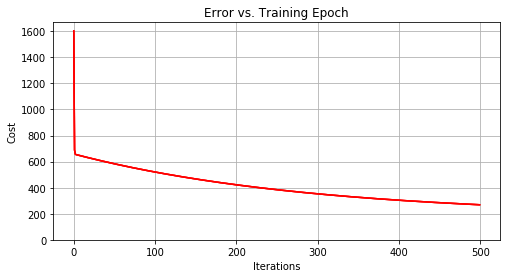

In [105]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(iters), error, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_ylim(0.0)
ax.set_title('Error vs. Training Epoch')
ax.grid(True)